# Trend analysis

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
# import pandas as pd
import dask
# from mpl_toolkits.basemap import Basemap
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
%matplotlib inline

In [2]:
from functions import ccplot, binning

In [3]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
# plt.style.use('seaborn-pastel')
# sns.set_theme(style="ticks")
plt.style.use(['science', 'notebook'])

In [4]:
# Colormap selection
xr.set_options(cmap_divergent='RdBu_r', cmap_sequential='YlGnBu')

###  importing and preparing data

In [5]:
mfdata_DIR1 = './data/GPM_lowres_data/*.nc'

gpm = xr.open_mfdataset(mfdata_DIR1, chunks = dict(time=-1, lat=40, lon=40), engine='netcdf4')

In [6]:
gpm

<xarray.Dataset>
Dimensions:    (time: 369600, lon: 161, lat: 161)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:30:00
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(10272, 40, 40), meta=np.ndarray>

In [7]:
precip = gpm.precipCal.resample(time = '24H').sum() / 2

In [8]:
precip = precip.chunk(dict(time=-1, lat=40, lon=40))
precip

<xarray.DataArray 'precipCal' (time: 7700, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(7700, 161, 161), dtype=float32, chunksize=(7700, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-06-30
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

In [9]:
mfdata_DIR2 = './data/era_data/*.nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=-1, lat=40, lon=40), engine='netcdf4')
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [10]:
era = era.sel(expver=1, drop=True)

In [11]:
era = era.transpose('time', 'latitude', 'longitude')

In [12]:
era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})

In [13]:
era = era.rename({'longitude':'lon', 'latitude':'lat'})

In [14]:
era = era.sel(time = slice("2000-06-01 00:00:00","2021-06-30 23:00:00"))

In [15]:
era

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, time: 184800)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2000-06-01 ... 2021-06-30T23:00:00
Data variables:
    u10      (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    v10      (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    d2m      (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    t2m      (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    mx2t     (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    mn2t     (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(5136, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-02 12:58:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [16]:
t2m = era.t2m.resample(time='24H').mean()
d2m = era.d2m.resample(time='24H').mean()

In [17]:
t2m = t2m.chunk(dict(time=-1, lat=40, lon=40))
d2m = d2m.chunk(dict(time=-1, lat=40, lon=40))

In [18]:
d2m

<xarray.DataArray 'd2m' (time: 7700, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(7700, 161, 161), dtype=float32, chunksize=(7700, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-06-30
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0

In [19]:
# precip_year_mean_loaded = precip_year_mean.chunk(dict(time = -1, lat = 40, lon=40)).load()
# t2m_year_mean_loaded = t2m_year_mean.chunk(dict(time = -1, lat = 40, lon=40)).load()
# d2m_year_mean_loaded = d2m_year_mean.chunk(dict(time = -1, lat = 40, lon=40)).load()

ds_comb = xr.merge([precip, t2m, d2m])

In [20]:
ds_comb

<xarray.Dataset>
Dimensions:    (lat: 161, time: 7700, lon: 161)
Coordinates:
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
  * time       (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-06-30
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(7700, 40, 40), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(7700, 1, 40), meta=np.ndarray>
    d2m        (time, lat, lon) float32 dask.array<chunksize=(7700, 1, 40), meta=np.ndarray>

In [21]:
ds_comb_loaded = ds_comb.load()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



### Climatology

In [ ]:
precip_year_mean = precip.resample(time = 'Y').mean()
t2m_year_mean = t2m.resample(time = 'Y').mean()
d2m_year_mean = d2m.resample(time = 'Y').mean()

In [ ]:
# precip_year_mean.isel(time = 1).plot()

### Trends

In [13]:
t2m_monthly = t2m.resample(time='M').mean()
d2m_monthly = d2m.resample(time='M').mean()

In [14]:
# t2m_daily = t2m.resample(time='D').mean()
# d2m_daily = d2m.resample(time='D').mean()

In [15]:
mon = [6,7,8,9]
premon = [3,4,5]
postmon = [10,11,12]
wint = [1,2]

In [94]:
t2m_wint = xr.concat([list(t2m_monthly.groupby('time.month'))[i-1][1] for i in wint], dim='time')
d2m_wint = xr.concat([list(d2m_monthly.groupby('time.month'))[i-1][1] for i in wint], dim='time')

In [95]:
t2m_wint = t2m_wint.sortby('time.year')
d2m_wint = d2m_wint.sortby('time.year')

In [97]:
t2m_wint

<xarray.DataArray 't2m' (time: 42, lat: 161, lon: 161)>
dask.array<getitem, shape=(42, 161, 161), dtype=float32, chunksize=(1, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-31 2001-02-28 ... 2021-02-28
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0

In [98]:
t2m_monthly_loaded = t2m_wint.load()
d2m_monthly_loaded = d2m_wint.load()

In [77]:
# t2m_daily_loaded = t2m_daily.load()
# d2m_daily_loaded = d2m_daily.load()

In [99]:
t2m_monthly_loaded

<xarray.DataArray 't2m' (time: 42, lat: 161, lon: 161)>
array([[[270.92825, 270.83908, 270.79407, ..., 266.70593, 266.47766,
         266.21103],
        [271.43674, 271.3217 , 271.2378 , ..., 266.07336, 265.93155,
         265.98364],
        [272.01202, 271.86856, 271.75443, ..., 267.3069 , 266.69434,
         266.4261 ],
        ...,
        [299.85355, 299.8727 , 299.89667, ..., 296.49728, 294.41083,
         295.2932 ],
        [299.87006, 299.8861 , 299.91064, ..., 299.3303 , 297.10922,
         294.8912 ],
        [299.89047, 299.906  , 299.92926, ..., 300.10995, 299.6045 ,
         297.3317 ]],

       [[277.60492, 277.49945, 277.39175, ..., 270.8696 , 270.54974,
         270.16153],
        [278.02084, 277.87332, 277.69965, ..., 270.23367, 270.05356,
         269.95514],
        [278.30353, 278.12836, 277.99625, ..., 271.0473 , 270.73306,
         270.41675],
...
        [299.4134 , 299.4052 , 299.3969 , ..., 296.92636, 294.64655,
         295.26443],
        [299.47794, 299.4713 , 299.45584, ..., 299.9111 , 297.55682,
         295.0995 ],
        [299.56046, 299.56198, 299.54556, ..., 300.81946, 300.29474,
         297.80002]],

       [[279.8355 , 279.83853, 279.76846, ..., 274.91867, 274.74185,
         274.48508],
        [280.32217, 280.28876, 280.12228, ..., 274.23837, 274.0346 ,
         273.99353],
        [280.44922, 280.42532, 280.43268, ..., 274.91782, 274.4825 ,
         274.0812 ],
        ...,
        [300.1732 , 300.19574, 300.21426, ..., 297.4379 , 295.26093,
         295.91644],
        [300.21307, 300.23706, 300.2548 , ..., 300.3684 , 298.1015 ,
         295.68896],
        [300.25412, 300.2854 , 300.2999 , ..., 301.19638, 300.82047,
         298.365  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-31 2001-02-28 ... 2021-02-28
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0

### M-K test

In [23]:
import pymannkendall as mk
# import statsmodels.api as sm

In [24]:
def mkres(arr):
    res = mk.original_test(arr, alpha=0.005)
    return res.slope, res.Tau, res.p

def seasonal_mkres(arr):
    res = mk.seasonal_test(arr, alpha=0.005, period=12)
    return res.slope, res.Tau, res.p

In [25]:
def get_mkres(da, mk_type=None):
    print("Starting the test ...")
    xrange = len(da[0])
    yrange = len(da[0][0])
    
    print("converting the dataarray to numpy array ...")
    arr = da.to_numpy()
    
    print("Now initializing the arrays")
    mk_slope = np.empty((xrange, yrange))
    mk_tau = np.empty((xrange, yrange))
    mk_p =  np.empty((xrange, yrange))
    
    print("Now starting the loop ...")
    for lat in range(xrange):
        for lon in range(yrange):
            if mk_type == None:
                mk_slope[lat, lon], mk_tau[lat, lon], mk_p[lat, lon] = mkres(arr[:,lat,lon])
            elif mk_type == 'seasonal':
                mk_slope[lat, lon], mk_tau[lat, lon], mk_p[lat, lon] = seasonal_mkres(arr[:,lat,lon])
            else:
                print("ERROR : wrong value of mk_type given")
                break
                
            print(f"Completed {lat+1}/{xrange} lat and {lon+1}/{yrange} lon")
            
    print("Done, now writing")
    
    return mk_slope, mk_tau, mk_p

In [100]:
t2m_slope_mk, t2m_tau_mk, t2m_p_mk = get_mkres(t2m_monthly_loaded)

Starting the test ...
converting the dataarray to numpy array ...
Now initializing the arrays
Now starting the loop ...
Completed 1/161 lat and 1/161 lon
Completed 1/161 lat and 2/161 lon
Completed 1/161 lat and 3/161 lon
Completed 1/161 lat and 4/161 lon
Completed 1/161 lat and 5/161 lon
Completed 1/161 lat and 6/161 lon
Completed 1/161 lat and 7/161 lon
Completed 1/161 lat and 8/161 lon
Completed 1/161 lat and 9/161 lon
Completed 1/161 lat and 10/161 lon
Completed 1/161 lat and 11/161 lon
Completed 1/161 lat and 12/161 lon
Completed 1/161 lat and 13/161 lon
Completed 1/161 lat and 14/161 lon
Completed 1/161 lat and 15/161 lon
Completed 1/161 lat and 16/161 lon
Completed 1/161 lat and 17/161 lon
Completed 1/161 lat and 18/161 lon
Completed 1/161 lat and 19/161 lon
Completed 1/161 lat and 20/161 lon
Completed 1/161 lat and 21/161 lon
Completed 1/161 lat and 22/161 lon
Completed 1/161 lat and 23/161 lon
Completed 1/161 lat and 24/161 lon
Completed 1/161 lat and 25/161 lon
Completed 1/16

In [101]:
t2m_slope_mk_seasonal, t2m_tau_mk_seasonal, t2m_p_mk_seasonal = get_mkres(t2m_monthly_loaded, mk_type='seasonal')

Starting the test ...
converting the dataarray to numpy array ...
Now initializing the arrays
Now starting the loop ...
Completed 1/161 lat and 1/161 lon
Completed 1/161 lat and 2/161 lon
Completed 1/161 lat and 3/161 lon
Completed 1/161 lat and 4/161 lon
Completed 1/161 lat and 5/161 lon
Completed 1/161 lat and 6/161 lon
Completed 1/161 lat and 7/161 lon
Completed 1/161 lat and 8/161 lon
Completed 1/161 lat and 9/161 lon
Completed 1/161 lat and 10/161 lon
Completed 1/161 lat and 11/161 lon
Completed 1/161 lat and 12/161 lon
Completed 1/161 lat and 13/161 lon
Completed 1/161 lat and 14/161 lon
Completed 1/161 lat and 15/161 lon
Completed 1/161 lat and 16/161 lon
Completed 1/161 lat and 17/161 lon
Completed 1/161 lat and 18/161 lon
Completed 1/161 lat and 19/161 lon
Completed 1/161 lat and 20/161 lon
Completed 1/161 lat and 21/161 lon
Completed 1/161 lat and 22/161 lon
Completed 1/161 lat and 23/161 lon
Completed 1/161 lat and 24/161 lon
Completed 1/161 lat and 25/161 lon
Completed 1/16

In [102]:
d2m_slope_mk, d2m_tau_mk, d2m_p_mk = get_mkres(d2m_monthly_loaded)

Starting the test ...
converting the dataarray to numpy array ...
Now initializing the arrays
Now starting the loop ...
Completed 1/161 lat and 1/161 lon
Completed 1/161 lat and 2/161 lon
Completed 1/161 lat and 3/161 lon
Completed 1/161 lat and 4/161 lon
Completed 1/161 lat and 5/161 lon
Completed 1/161 lat and 6/161 lon
Completed 1/161 lat and 7/161 lon
Completed 1/161 lat and 8/161 lon
Completed 1/161 lat and 9/161 lon
Completed 1/161 lat and 10/161 lon
Completed 1/161 lat and 11/161 lon
Completed 1/161 lat and 12/161 lon
Completed 1/161 lat and 13/161 lon
Completed 1/161 lat and 14/161 lon
Completed 1/161 lat and 15/161 lon
Completed 1/161 lat and 16/161 lon
Completed 1/161 lat and 17/161 lon
Completed 1/161 lat and 18/161 lon
Completed 1/161 lat and 19/161 lon
Completed 1/161 lat and 20/161 lon
Completed 1/161 lat and 21/161 lon
Completed 1/161 lat and 22/161 lon
Completed 1/161 lat and 23/161 lon
Completed 1/161 lat and 24/161 lon
Completed 1/161 lat and 25/161 lon
Completed 1/16

In [103]:
d2m_slope_mk_seasonal, d2m_tau_mk_seasonal, d2m_p_mk_seasonal = get_mkres(d2m_monthly_loaded, mk_type='seasonal')

Starting the test ...
converting the dataarray to numpy array ...
Now initializing the arrays
Now starting the loop ...
Completed 1/161 lat and 1/161 lon
Completed 1/161 lat and 2/161 lon
Completed 1/161 lat and 3/161 lon
Completed 1/161 lat and 4/161 lon
Completed 1/161 lat and 5/161 lon
Completed 1/161 lat and 6/161 lon
Completed 1/161 lat and 7/161 lon
Completed 1/161 lat and 8/161 lon
Completed 1/161 lat and 9/161 lon
Completed 1/161 lat and 10/161 lon
Completed 1/161 lat and 11/161 lon
Completed 1/161 lat and 12/161 lon
Completed 1/161 lat and 13/161 lon
Completed 1/161 lat and 14/161 lon
Completed 1/161 lat and 15/161 lon
Completed 1/161 lat and 16/161 lon
Completed 1/161 lat and 17/161 lon
Completed 1/161 lat and 18/161 lon
Completed 1/161 lat and 19/161 lon
Completed 1/161 lat and 20/161 lon
Completed 1/161 lat and 21/161 lon
Completed 1/161 lat and 22/161 lon
Completed 1/161 lat and 23/161 lon
Completed 1/161 lat and 24/161 lon
Completed 1/161 lat and 25/161 lon
Completed 1/16

In [109]:
mkslope = xr.DataArray(d2m_slope_mk, dims=("lat", "lon"), coords={"lat":d2m.coords['lat'], "lon":d2m.coords['lon']})

mktau = xr.DataArray(d2m_tau_mk, dims=("lat", "lon"), coords={"lat":d2m.coords['lat'], "lon":d2m.coords['lon']})

mkp = xr.DataArray(d2m_p_mk, dims=("lat", "lon"), coords={"lat":d2m.coords['lat'], "lon":d2m.coords['lon']})

In [110]:
mkslope_seasonal = xr.DataArray(d2m_slope_mk_seasonal, dims=("lat", "lon"), coords={"lat":d2m.coords['lat'], "lon":d2m.coords['lon']})

mktau_seasonal = xr.DataArray(d2m_tau_mk_seasonal, dims=("lat", "lon"), coords={"lat":d2m.coords['lat'], "lon":d2m.coords['lon']})

mkp_seasonal = xr.DataArray(d2m_p_mk_seasonal, dims=("lat", "lon"), coords={"lat":d2m.coords['lat'], "lon":d2m.coords['lon']})

In [111]:
mkslope.to_netcdf('./data/results/wint/trends/monthly/d2m/mkslope.nc')
mktau.to_netcdf('./data/results/wint/trends/monthly/d2m/mktau.nc')
mkp.to_netcdf('./data/results/wint/trends/monthly/d2m/mkp.nc')

mkslope_seasonal.to_netcdf('./data/results/wint/trends/monthly/d2m/mkslope_seasonal.nc')
mktau_seasonal.to_netcdf('./data/results/wint/trends/monthly/d2m/mktau_seasonal.nc')
mkp_seasonal.to_netcdf('./data/results/wint/trends/monthly/d2m/mkp_seasonal.nc')

### Plotting

In [33]:
def plot_3d(slope_da, p_da, extent_list, title, threshold_sig=0.001, marker_size=2, plot_type = 'slope', **kwargs):
    """
    Function to plot the output of binning 3d function
    -----
    inputs are -
    slope_da : datarray containing slope
    p_da : datarray containing R^2 values for goodness of fit
    title : The title of the output plot
    extent_list : [59.9, 100.1, -0.1, 40.1]
    """
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent_list, crs=ccrs.PlateCarree())
    if plot_type == 'slope':
        slope_da.plot.contourf(ax = ax, cbar_kwargs={"label":"Theil-Sen slope"}, **kwargs)
    elif plot_type == 'tau':
        slope_da.plot.contourf(ax = ax, cbar_kwargs={"label":"Kendall tau values"}, **kwargs)
    else:
        print("wrong value of plot_type")
    # (100*(np.exp(slope_da) - 1)).plot.pcolormesh(ax = ax, cbar_kwargs={"label":"C-C scale"}, **kwargs)
    x, y = np.meshgrid(slope_da.coords['lon'], slope_da.coords['lat'])
    plt.scatter(x[(np.abs(p_da.to_numpy()) < threshold_sig)],y[(np.abs(p_da.to_numpy()) < threshold_sig)], marker='o', color = 'k', s=marker_size)
    gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.05, linestyle='--')
    # ax.coastlines(alpha=0.7)
    # ax.add_feature(cfeature.BORDERS, alpha=0.7)
    ax.add_feature(cfeature.COASTLINE, alpha=1.0)
    gridliner.top_labels = False
    gridliner.right_labels = False
    gridliner.ylines = False  # you need False
    gridliner.xlines = False  # you need False
    ax.set_title(title)
    # ax.set_xlabel('Latitude')
    # ax.set_ylabel('Longitude')
    # ax.tick_params(axis='both', labelsize=12)

In [34]:
# Extent_lists
ind = [59.9, 100.1, -0.1, 40.1]
sip = [77.65, 84.1, 7.9, 18.85]
wcwg = [71.9, 77.15, 7.9, 18.85]
cir = [75.9, 86.1, 18.9, 26.1]

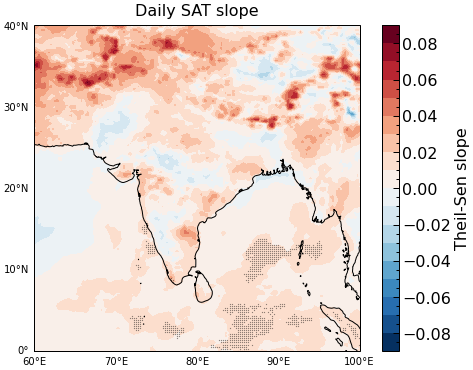

In [107]:
plot_3d(mkslope, mkp, ind, "Daily SAT slope", threshold_sig=0.005, marker_size=0.03, plot_type='slope', levels=20)
plt.savefig('./images/wint/trends/sat_monthly.pdf', dpi=300)

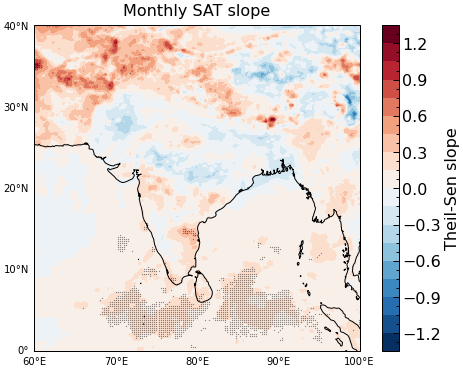

In [108]:
plot_3d(mkslope_seasonal, mkp_seasonal, ind, "Monthly SAT slope", threshold_sig=0.005, marker_size=0.03, plot_type='slope', levels=20)
plt.savefig('./images/wint/trends/sat_monthly_seasonal.pdf', dpi=300)

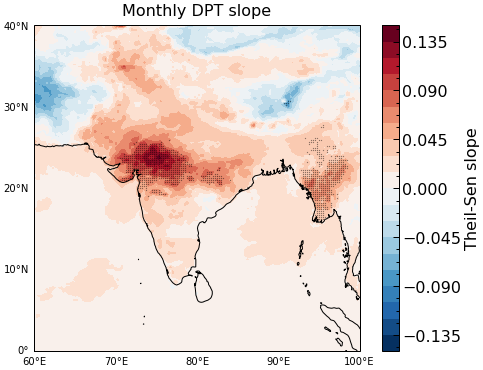

In [112]:
plot_3d(mkslope, mkp, ind, "Monthly DPT slope", threshold_sig=0.005, marker_size=0.03, plot_type='slope', levels=20)
plt.savefig('./images/wint/trends/dpt_monthly.pdf', dpi=300)

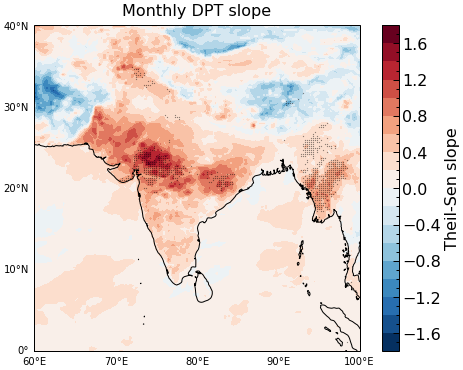

In [113]:
plot_3d(mkslope_seasonal, mkp_seasonal, ind, "Monthly DPT slope", threshold_sig=0.005, marker_size=0.03, plot_type='slope', levels=20)
plt.savefig('./images/wint/trends/dpt_monthly_seasonal.pdf', dpi=300)